___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
#Let's first read the data by pandas
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
#Let's see the head of our data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [4]:
#Let's see the describtion of the obj data
ad_data.describe(include='O').T

,count,unique,top,freq
Ad Topic Line,1000,1000,Cloned 5thgeneration orchestration,1
City,1000,969,Lisamouth,3
Country,1000,237,France,9
Timestamp,1000,1000,2016-03-27 00:53:11,1


In [5]:
#Let's see the describtion of the num data
ad_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
#Let's see the info of the data
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

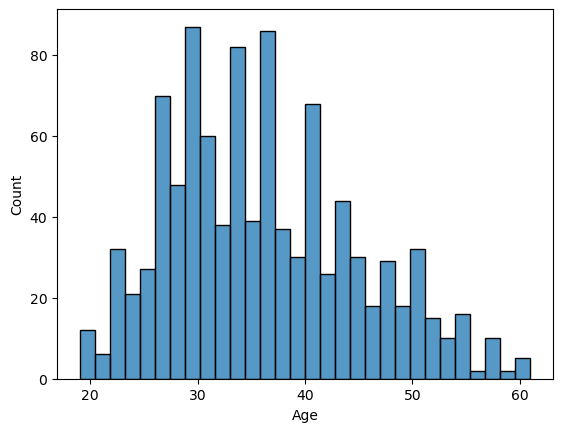

In [7]:
sns.histplot(ad_data['Age'], bins=30)
plt.show()

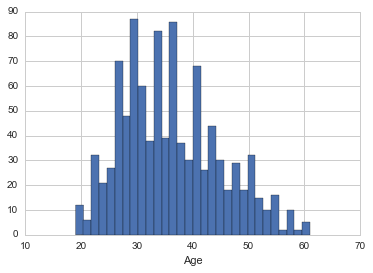

**Create a jointplot showing Area Income versus Age.**

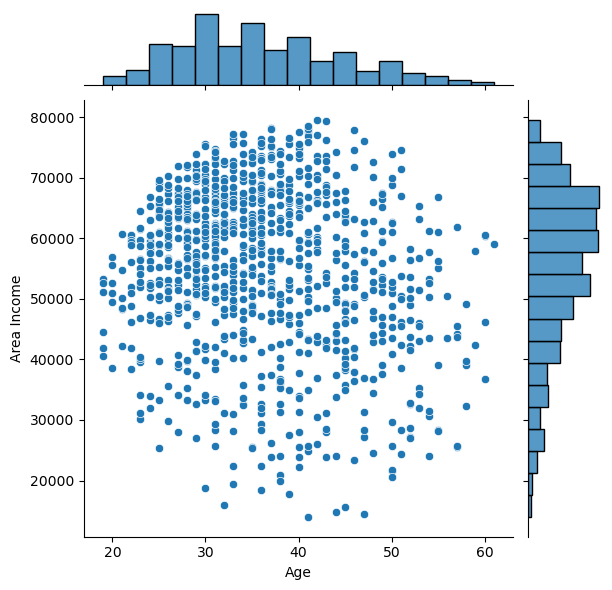

In [8]:
#Creating a jointplot to see the Age with Area Income
sns.jointplot(x = 'Age', y = 'Area Income', data=ad_data)
plt.show()

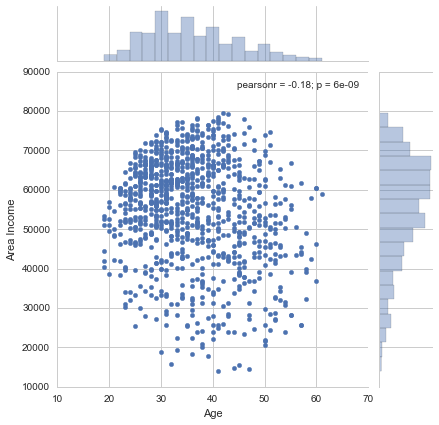

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

In [9]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

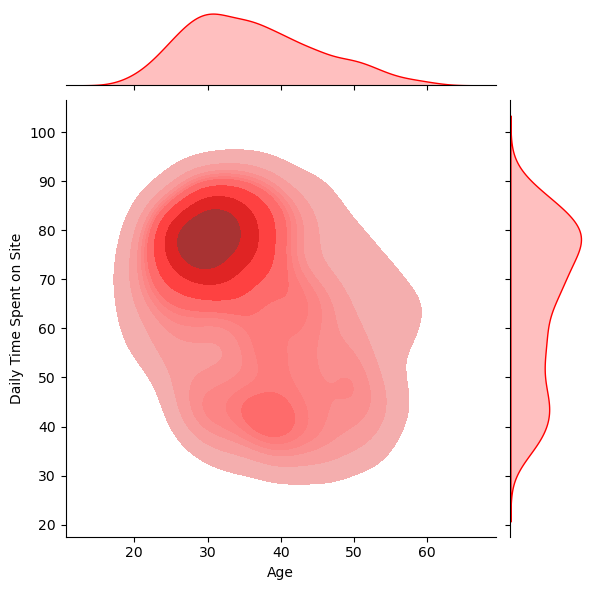

In [10]:
#Creating a jointplot for Daily Time spent on site with Age
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', kind='kde', fill=True, color='red', data=ad_data)
plt.show()

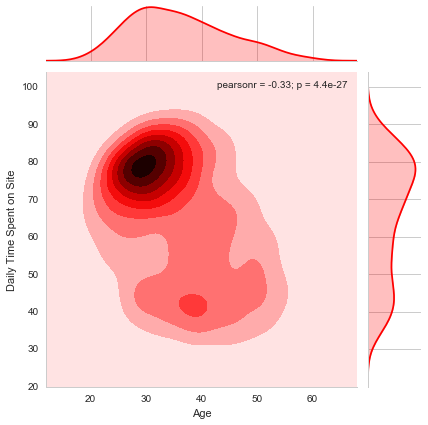

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

<function matplotlib.pyplot.show(close=None, block=None)>

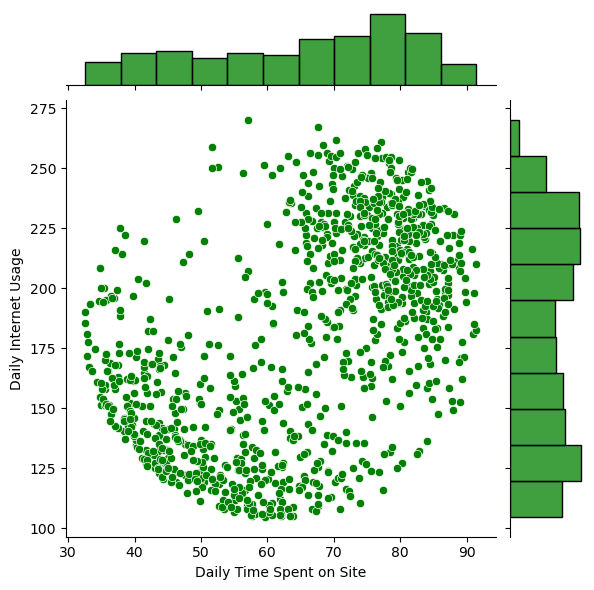

In [11]:
#Let's create a jointplot for Daily Time Spent on Site and Daily Internet Usage
sns.jointplot(x = 'Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')
plt.show

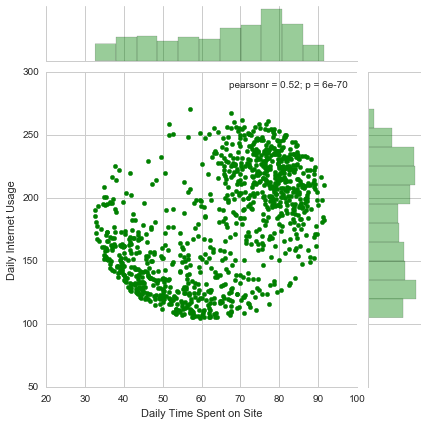

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

C:\Users\habob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


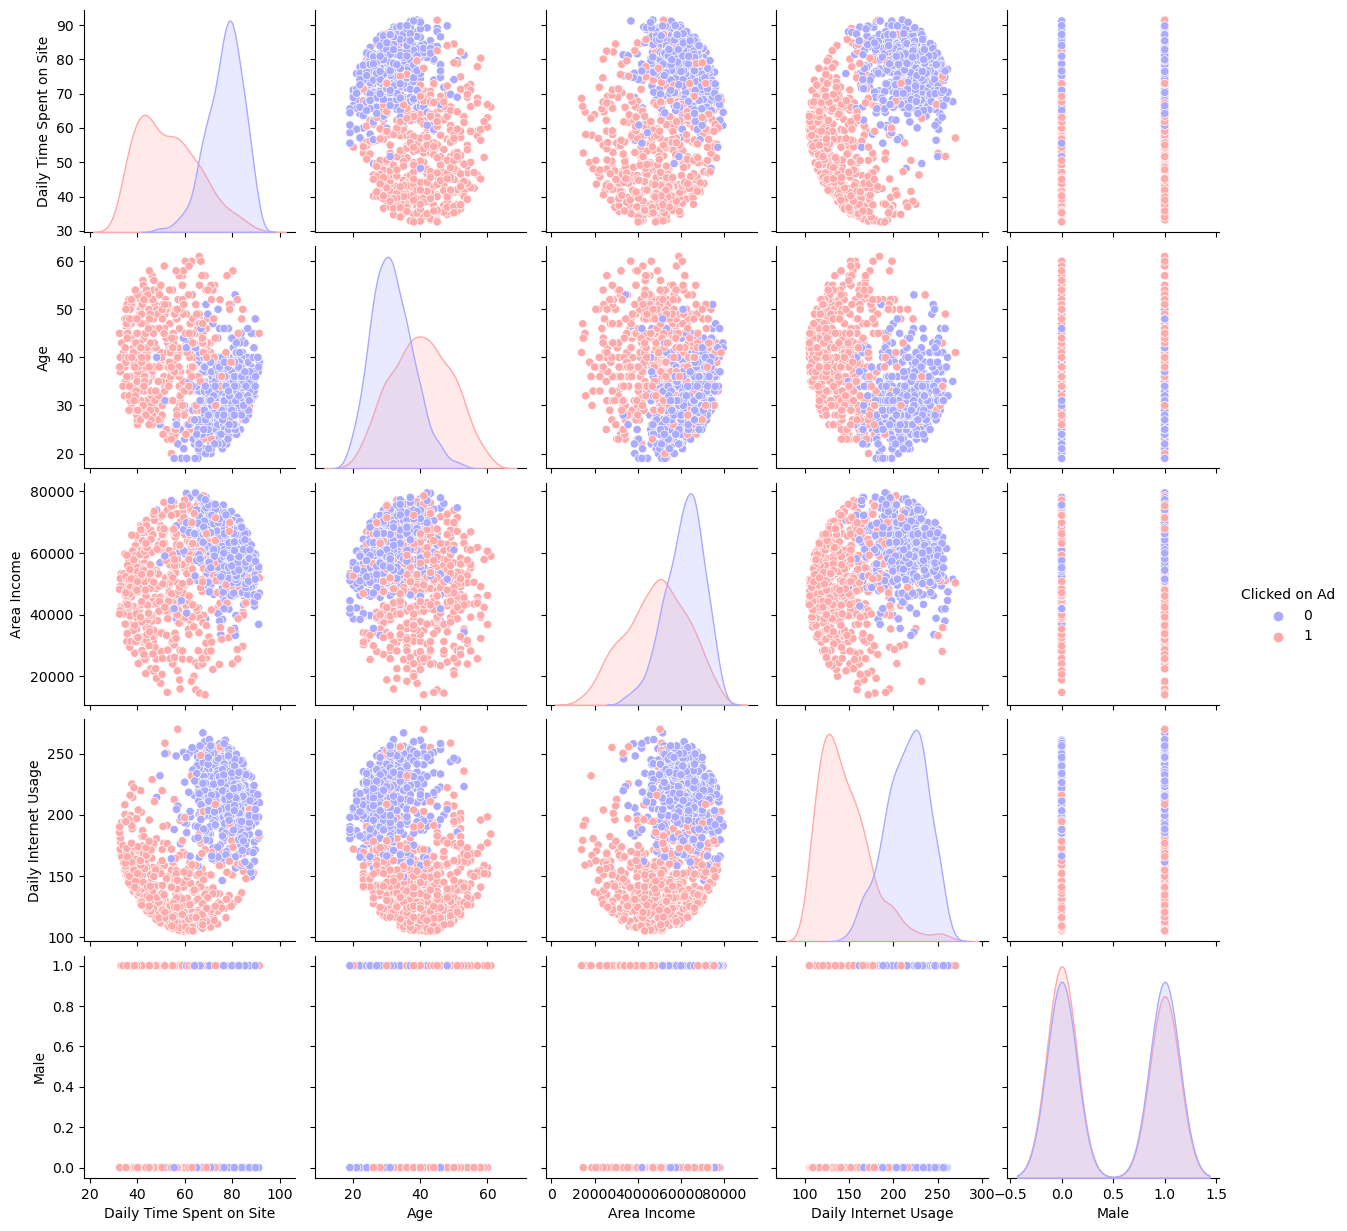

In [12]:
#Creating a pairplot to show the Clicked on Ad
sns.pairplot(data=ad_data, hue= 'Clicked on Ad', palette='bwr')
plt.show()

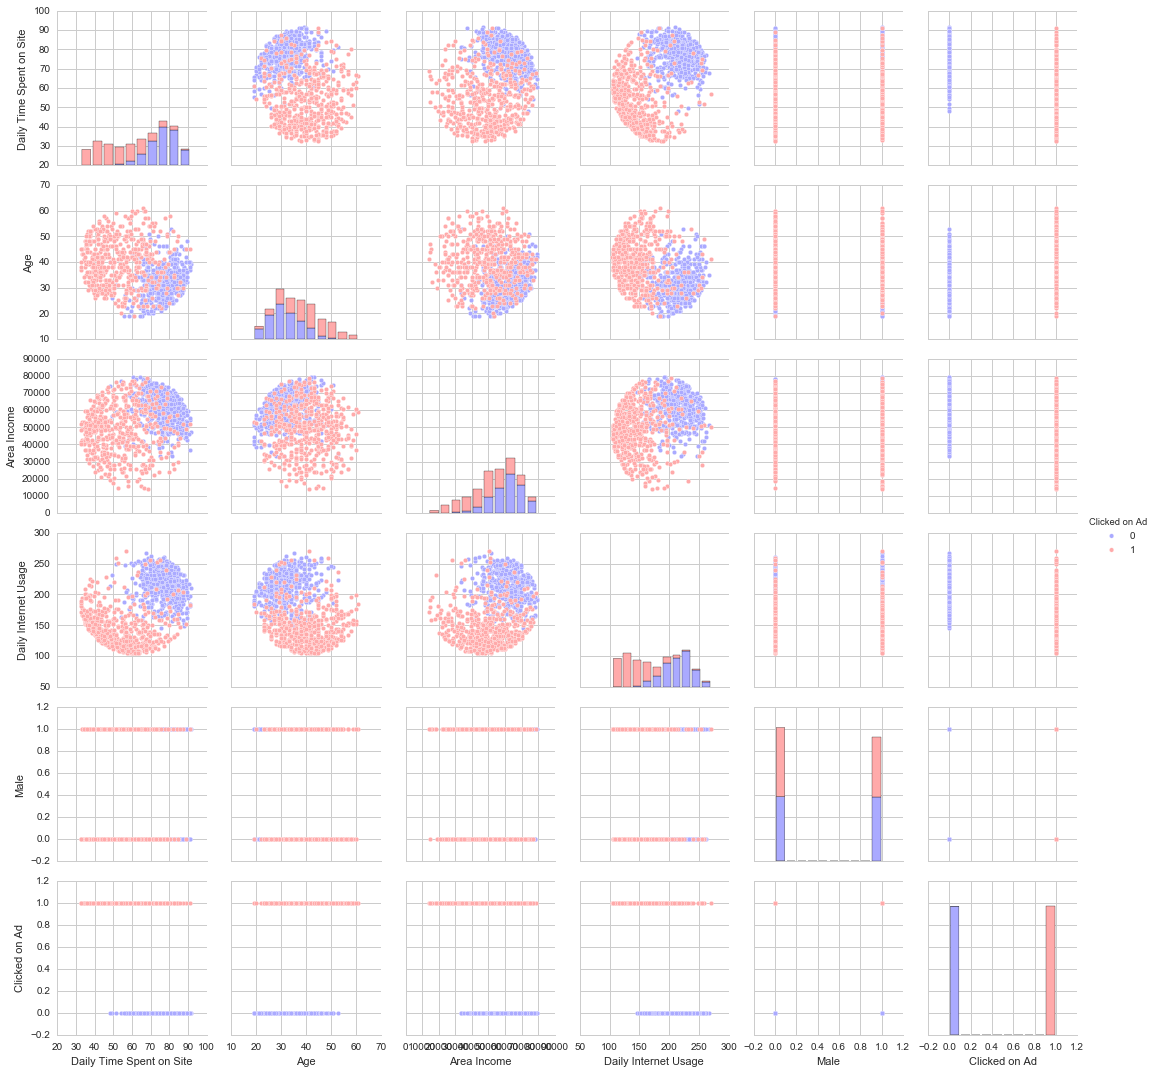

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [13]:
X = ad_data.drop('Clicked on Ad', axis=1)
y = ad_data['Clicked on Ad']

In [14]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
print(X_train.shape)
print(X_test.shape)

(800, 9)
(200, 9)


feature scaling

In [18]:
scaler = StandardScaler()

In [19]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [22]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder='passthrough',
    verbose_feature_names_out=False,
)

In [23]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object'))],
                  verbose_feature_names_out=False)

**Train and fit a logistic regression model on the training set.**

In [25]:
# Create a pipeline with a standard scaler and logistic regression model
operation = [
    ('OneHot', column_trans),
    ('scaler', scaler),
    ('logistic_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False,random_state=101))
]

lg_model = Pipeline(operation)

# Train the model on the training data
lg_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic_regression',
                 LogisticRegression(multi_class='ovr', n_jobs=1,
                                    random_state=101, solver='liblinear'))])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [29]:
param_grid = {
    "log__C": [100, 10, 1.0, 0.1, 0.01],
    "log__penalty": ["l1", "l2"],
    "log__solver": ['newton-cg', 'lbfgs', 'liblinear'],
}


operations = [
    ("OneHotEncoder", column_trans),
    ('scaler', scaler),
    ("log",LogisticRegression(max_iter=10000, random_state=101),),
]


model = Pipeline(steps=operations)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    return_train_score=True,
)

log_model_grid.fit(X_train, y_train)

C:\Users\habob\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\habob\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\habob\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\habob\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [100, 10, 1.0, 0.1, 0.01],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy')

In [32]:
print("Best: %f using %s" % (log_model_grid.best_score_, log_model_grid.best_params_))
means = log_model_grid.cv_results_['mean_test_score']
stds = log_model_grid.cv_results_['std_test_score']
params = log_model_grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.958333 using {'log__C': 1.0, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
nan (nan) with: {'log__C': 100, 'log__penalty': 'l1', 'log__solver': 'newton-cg'}
nan (nan) with: {'log__C': 100, 'log__penalty': 'l1', 'log__solver': 'lbfgs'}
0.953750 (0.021687) with: {'log__C': 100, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
0.939167 (0.020344) with: {'log__C': 100, 'log__penalty': 'l2', 'log__solver': 'newton-cg'}
0.939167 (0.020344) with: {'log__C': 100, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}
0.940000 (0.019203) with: {'log__C': 100, 'log__penalty': 'l2', 'log__solver': 'liblinear'}
nan (nan) with: {'log__C': 10, 'log__penalty': 'l1', 'log__solver': 'newton-cg'}
nan (nan) with: {'log__C': 10, 'log__penalty': 'l1', 'log__solver': 'lbfgs'}
0.957083 (0.021086) with: {'log__C': 10, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
0.939167 (0.019826) with: {'log__C': 10, 'log__penalty': 'l2', 'log__solver': 'newton-cg'}
0.939167 (0.019826) with: {'log__C': 10, 'log__pe

## Predictions and Evaluations
**Now predict values for the testing data.**

In [33]:
predict = log_model_grid.predict(X_test)
predict

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0], dtype=int64)

**Create a Confusion Matrix for the model.**

In [35]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       105
           1       1.00      0.93      0.96        95

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



## k-Nearest Neighbors

In [39]:
operation = [
    ('OneHot', column_trans),
    ('scaler', scaler),
    ('KNN',KNeighborsClassifier(n_neighbors=3))
]

knn = Pipeline(operation)

# Train the model on the training data
knn.fit(X_train, y_train)

Pipeline(steps=[('OneHot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=3))])

#### KNN prediction

In [40]:
#Predicting the X_test with knn model
knn_pred = knn.predict(X_test)
knn_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

#### Confusion Matrix for the knn model

In [41]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.62      0.30      0.41       105
           1       0.51      0.79      0.62        95

    accuracy                           0.54       200
   macro avg       0.56      0.55      0.51       200
weighted avg       0.56      0.54      0.51       200



## random forest classifier

In [42]:
operation = [
    ('OneHot', column_trans),
    ('scaler', scaler),
    ('RF',RandomForestClassifier(random_state=101))
]

rf = Pipeline(operation)

# Train the model on the training data
rf.fit(X_train, y_train)

Pipeline(steps=[('OneHot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('RF', RandomForestClassifier(random_state=101))])

### RF prediction

In [43]:
#Predicting the X_test with knn model
rf_pred = rf.predict(X_test)
rf_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0], dtype=int64)

#### Confusion Matrix for the RF model

In [44]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.98      0.95      0.96        95

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



## Great Job!